<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Adding-Feature" data-toc-modified-id="Adding-Feature-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Adding Feature</a></span></li><li><span><a href="#Plotting---Different-patterns" data-toc-modified-id="Plotting---Different-patterns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting - Different patterns</a></span></li><li><span><a href="#Updating-the-model" data-toc-modified-id="Updating-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Updating the model</a></span></li><li><span><a href="#Including-an-additional-interaction" data-toc-modified-id="Including-an-additional-interaction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Including an additional interaction</a></span></li><li><span><a href="#Taking-the-residue" data-toc-modified-id="Taking-the-residue-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Taking the residue</a></span><ul class="toc-item"><li><span><a href="#Visualizing-residuals" data-toc-modified-id="Visualizing-residuals-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Visualizing residuals</a></span></li></ul></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ARIMA</a></span></li></ul></div>

In [1]:
import pandas as pd


train = pd.read_csv("../input/train.csv")
train["date"] = pd.to_datetime(train["date"])
train

date        mw  temp  hour  day  weekday  month  \
0     2017-02-01 00:53:00+00:00  1419.881  37.0     0    1        2      2   
1     2017-02-01 01:53:00+00:00  1379.505  37.0     1    1        2      2   
2     2017-02-01 02:53:00+00:00  1366.106  36.0     2    1        2      2   
3     2017-02-01 03:53:00+00:00  1364.453  36.0     3    1        2      2   
4     2017-02-01 04:53:00+00:00  1391.265  36.0     4    1        2      2   
...                         ...       ...   ...   ...  ...      ...    ...   
25531 2019-12-31 19:53:00+00:00  1522.008  32.0    19   31        1     12   
25532 2019-12-31 20:53:00+00:00  1487.581  32.0    20   31        1     12   
25533 2019-12-31 21:53:00+00:00  1463.407  32.0    21   31        1     12   
25534 2019-12-31 22:53:00+00:00  1395.177  30.0    22   31        1     12   
25535 2019-12-31 23:53:00+00:00  1321.977  30.0    23   31        1     12   

       year  
0      2017  
1      2017  
2      2017  
3      2017  
4      2017  
...     ...  
25531  2019  
25532  2019  
25533  2019  
25534  2019  
25535  2019  

[25536 rows x 8 columns]

In [2]:
test = pd.read_csv("../input/test.csv")
test["date"] = pd.to_datetime(test["date"])
test

date        mw  temp  hour  day  weekday  month  year
0   2020-01-01 00:53:00+00:00  1363.428  31.0     0    1        2      1  2020
1   2020-01-01 01:53:00+00:00  1335.975  29.0     1    1        2      1  2020
2   2020-01-01 02:53:00+00:00  1296.817  30.0     2    1        2      1  2020
3   2020-01-01 03:53:00+00:00  1288.403  30.0     3    1        2      1  2020
4   2020-01-01 04:53:00+00:00  1292.263  31.0     4    1        2      1  2020
..                        ...       ...   ...   ...  ...      ...    ...   ...
739 2020-01-31 19:53:00+00:00  1719.479  34.0    19   31        4      1  2020
740 2020-01-31 20:53:00+00:00  1682.977  33.0    20   31        4      1  2020
741 2020-01-31 21:53:00+00:00  1610.025  33.0    21   31        4      1  2020
742 2020-01-31 22:53:00+00:00  1516.644  33.0    22   31        4      1  2020
743 2020-01-31 23:53:00+00:00  1434.425  34.0    23   31        4      1  2020

[744 rows x 8 columns]

# Adding Feature

In [3]:
from statsmodels.regression.linear_model import OLS


OLS(train['mw'], train['temp']).fit()

In [4]:
OLS.from_formula('mw ~ temp', data=train).fit()

In [5]:
OLS.from_formula('mw ~ temp + C(day)', data=train).fit()

> Build the linear regression model with hour of day, day of week, month of year, temperature, and temperature squared all trying to predict energy usage.

In [6]:
model = OLS.from_formula(
    "mw ~ temp + C(day) + C(weekday) + C(month) + temp + temp * temp", data=train
).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     267.0
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:27:35   Log-Likelihood:            -1.7553e+05
No. Observations:               25536   AIC:                         3.511e+05
Df Residuals:                   25487   BIC:                         3.515e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1456.9662     11.326    128.641      0.000    1434.767    1479.165
C(day)[T.2]        29.5509     11.425      2.587      0.010       7.157      51.944
C(day)[T.3]        34.2400     11.425      2.997      0.003      11.847      56.633
C(day)[T.4]        28.9512     11.426      2.534      0.011       6.556      51.346
C(day)[T.5]        17.8014     11.428      1.558      0.119      -4.599      40.202
C(day)[T.6]         6.2340     11.427      0.546      0.585     -16.163      28.632
C(day)[T.7]        -0.8444     11.429     -0.074      0.941     -23.246      21.558
C(day)[T.8]        -0.0065     11.428     -0.001      1.000     -22.407      22.394
C(day)[T.9]        11.5984     11.428      1.015      0.310     -10.802      33.999
C(day)[T.10]       23.5179     11.428      2.058      0.040       1.119      45.917
C(day)[T.11]        4.5344     11.428      0.397      0.692     -17.865      26.934
C(day)[T.12]       -0.8135     11.428     -0.071      0.943     -23.214      21.587
C(day)[T.13]       31.0021     11.432      2.712      0.007       8.595      53.409
C(day)[T.14]       18.0154     11.425      1.577      0.115      -4.378      40.409
C(day)[T.15]       18.8815     11.422      1.653      0.098      -3.507      41.270
C(day)[T.16]       47.7326     11.428      4.177      0.000      25.333      70.132
C(day)[T.17]       78.5561     11.428      6.874      0.000      56.157     100.955
C(day)[T.18]       63.9166     11.425      5.594      0.000      41.522      86.311
C(day)[T.19]       49.9170     11.426      4.369      0.000      27.522      72.312
C(day)[T.20]       30.8720     11.425      2.702      0.007       8.478      53.266
C(day)[T.21]       25.6129     11.426      2.242      0.025       3.218      48.008
C(day)[T.22]        3.5358     11.422      0.310      0.757     -18.852      25.924
C(day)[T.23]      -50.7372     11.425     -4.441      0.000     -73.130     -28.344
C(day)[T.24]      -58.7393     11.424     -5.142      0.000     -81.131     -36.347
C(day)[T.25]      -54.4183     11.426     -4.762      0.000     -76.815     -32.022
C(day)[T.26]      -31.8397     11.426     -2.787      0.005     -54.235      -9.444
C(day)[T.27]      -30.4885     11.425     -2.669      0.008     -52.882      -8.095
C(day)[T.28]      -19.5239     11.425     -1.709      0.087     -41.918       2.870
C(day)[T.29]       -2.0029     11.697     -0.171      0.864     -24.930      20.924
C(day)[T.30]       18.1022     11.699      1.547      0.122      -4.829      41.034
C(day)[T.31]       35.9820     13.468      2.672      0.008       9.584      62.380
C(weekday)[T.1]    22.9142      5.487      4.176      0.000      12.160      33.668
C(weekday)[T.2]    47.9113      5.490      8.727      0.000      37.151      58.672
C(weekday)[T.3]    46.9647      5.493      8.549      0.000

# Plotting - Different patterns

Quoting [the assignment](https://liveproject.manning.com/module/207_4_1/time-series-forecasting-in-python/3--na%c3%afve-energy-demand-model/3-1-building-the-na%c3%afve-energy-model?)

> In the previous section you also noticed that temperature might have a different relationship with energy during different months of the year. Plot the scatter plot between energy and temperature (as in the previous section), but only for the months of January and July.
Compare the pattern between the months that you see here.
It might help to overlay the plots from each month to help with this.

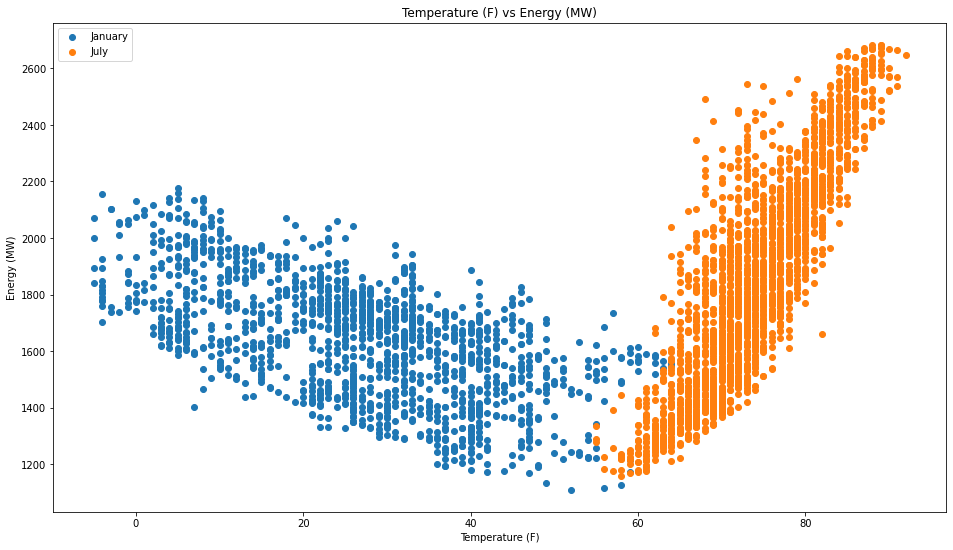

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 9))
plt.xlabel("Temperature (F)")
plt.ylabel("Energy (MW)")
plt.title("Temperature (F) vs Energy (MW)")
plt.scatter(
    train.loc[train["month"] == 1, "temp"],
    train.loc[train["month"] == 1, "mw"],
    label="January",
)
plt.scatter(
    train.loc[train["month"] == 7, "temp"],
    train.loc[train["month"] == 7, "mw"],
    label="July",
)
plt.legend()
plt.show()

Quoting again [the assignment](https://liveproject.manning.com/module/207_4_1/time-series-forecasting-in-python/3--na%c3%afve-energy-demand-model/3-1-building-the-na%c3%afve-energy-model?)

> In the previous section you also noticed that temperature might have a different relationship with energy during different times of the day. Plot the scatter plot between energy and temperature (as in the previous section), but only for the hours of midnight and noon.
Compare the pattern between the hours that you see here.
It might help to overlay the plots from each month to help with this.

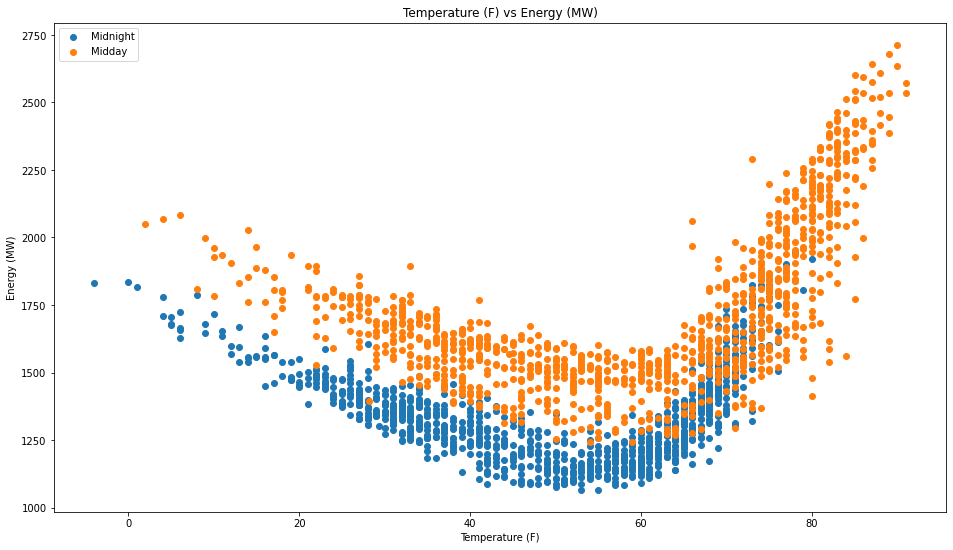

In [9]:
plt.figure(figsize=(16, 9))
plt.xlabel("Temperature (F)")
plt.ylabel("Energy (MW)")
plt.title("Temperature (F) vs Energy (MW)")
plt.scatter(
    train.loc[train["hour"] == 0, "temp"],
    train.loc[train["hour"] == 0, "mw"],
    label="Midnight",
)
plt.scatter(
    train.loc[train["hour"] == 12, "temp"],
    train.loc[train["hour"] == 12, "mw"],
    label="Midday",
)
plt.legend()
plt.show()

# Updating the model

In [10]:
model0 = OLS.from_formula(
    "mw ~ temp + C(day) + C(weekday) + C(month) + temp + temp * temp + temp * C(hour) + "
    + "temp * C(month) + temp * temp * C(hour) + temp * temp * C(month)",
    data=train,
).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1333.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:27:37   Log-Likelihood:            -1.5682e+05
No. Observations:               25536   AIC:                         3.138e+05
Df Residuals:                   25430   BIC:                         3.147e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1721.1174     12.802    134.441      0.000    1696.025    1746.210
C(day)[T.2]            17.6555      5.503      3.208      0.001       6.869      28.442
C(day)[T.3]            21.3463      5.511      3.873      0.000      10.545      32.148
C(day)[T.4]            12.0827      5.517      2.190      0.029       1.269      22.896
C(day)[T.5]            20.2239      5.520      3.664      0.000       9.404      31.044
C(day)[T.6]            30.0682      5.522      5.446      0.000      19.246      40.891
C(day)[T.7]            27.1075      5.522      4.909      0.000      16.284      37.932
C(day)[T.8]            19.6258      5.523      3.553      0.000       8.800      30.452
C(day)[T.9]            16.1209      5.513      2.924      0.003       5.315      26.927
C(day)[T.10]           20.3468      5.516      3.688      0.000       9.535      31.159
C(day)[T.11]           25.4998      5.536      4.606      0.000      14.649      36.351
C(day)[T.12]            0.8288      5.542      0.150      0.881     -10.034      11.692
C(day)[T.13]           22.2160      5.542      4.009      0.000      11.354      33.078
C(day)[T.14]           25.5499      5.536      4.616      0.000      14.700      36.400
C(day)[T.15]           18.4803      5.523      3.346      0.001       7.654      29.306
C(day)[T.16]           15.6123      5.527      2.825      0.005       4.780      26.445
C(day)[T.17]           41.0516      5.529      7.425      0.000      30.215      51.888
C(day)[T.18]           45.7326      5.530      8.269      0.000      34.893      56.572
C(day)[T.19]           46.7145      5.526      8.454      0.000      35.884      57.545
C(day)[T.20]           36.3108      5.526      6.571      0.000      25.479      47.142
C(day)[T.21]           34.8135      5.527      6.299      0.000      23.981      45.646
C(day)[T.22]           30.0933      5.530      5.442      0.000      19.255      40.932
C(day)[T.23]           -1.7694      5.547     -0.319      0.750     -12.642       9.103
C(day)[T.24]           -8.4445      5.541     -1.524      0.128     -19.306       2.417
C(day)[T.25]          -16.8327      5.540     -3.038      0.002     -27.691      -5.974
C(day)[T.26]           -9.0454      5.528     -1.636      0.102     -19.880       1.790
C(day)[T.27]            9.3345      5.524      1.690      0.091      -1.493      20.162
C(day)[T.28]           11.8742      5.527      2.148      0.032       1.041      22.708
C(day)[T.29]           29.3815      5.670      5.182      0.000      18.268      40.495
C(day)[T.30]           32.0222      5.675      5.643      0.000      20.899      43.145
C(day)[T.31]           29.8504      6.512      4.584      0.000      17.087      42.614
C(weekday)[T.1]        19.1343      2.644      7.237      0.000      13.952      24.317
C(w

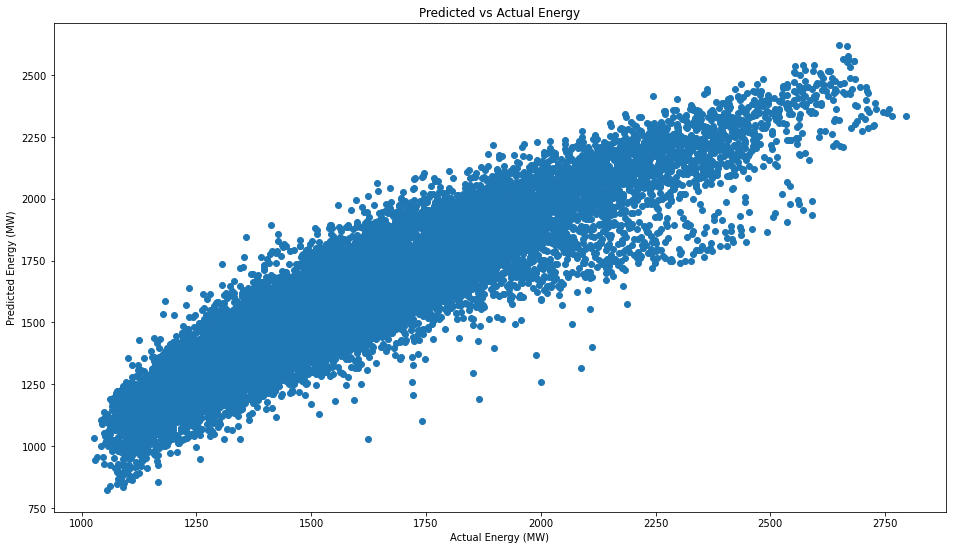

In [11]:
plt.figure(figsize=(16, 9))
plt.xlabel("Actual Energy (MW)")
plt.ylabel("Predicted Energy (MW)")
plt.title("Predicted vs Actual Energy")
plt.scatter(
    train["mw"],
    model0.predict(train),
)
plt.show()

A $R^2$ improvement form 0.335 to 0.846.

# Including an additional interaction

> Previously you also observed that the relationship between energy and hour of day changes depending on what day of the week it is. Add this new interaction to your linear regression model and evaluate your model.

In [12]:
model1 = OLS.from_formula(
    "mw ~ temp + C(day) + C(weekday) + C(month) + temp + temp * temp + temp * C(hour) + "
    + "temp * C(month) + temp * temp * C(hour) + temp * temp * C(month) +"
    + " C(hour) * C(weekday)",
    data=train,
).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     636.0
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:27:40   Log-Likelihood:            -1.5568e+05
No. Observations:               25536   AIC:                         3.118e+05
Df Residuals:                   25292   BIC:                         3.138e+05
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1688.5825     14.622    115.480      0.000    1659.922    1717.243
C(day)[T.2]                      17.7040      5.278      3.354      0.001       7.359      28.049
C(day)[T.3]                      21.3104      5.285      4.032      0.000      10.951      31.670
C(day)[T.4]                      12.0033      5.291      2.269      0.023       1.633      22.374
C(day)[T.5]                      20.1516      5.294      3.806      0.000       9.775      30.528
C(day)[T.6]                      29.9906      5.296      5.663      0.000      19.611      40.370
C(day)[T.7]                      27.0027      5.296      5.099      0.000      16.622      37.384
C(day)[T.8]                      19.5169      5.297      3.684      0.000       9.134      29.899
C(day)[T.9]                      16.0814      5.287      3.042      0.002       5.718      26.445
C(day)[T.10]                     20.2574      5.290      3.829      0.000       9.888      30.627
C(day)[T.11]                     25.2777      5.309      4.761      0.000      14.871      35.685
C(day)[T.12]                      0.4907      5.315      0.092      0.926      -9.928      10.909
C(day)[T.13]                     21.9355      5.315      4.127      0.000      11.518      32.353
C(day)[T.14]                     25.2869      5.309      4.763      0.000      14.881      35.692
C(day)[T.15]                     18.2128      5.297      3.438      0.001       7.830      28.596
C(day)[T.16]                     15.3717      5.300      2.900      0.004       4.983      25.760
C(day)[T.17]                     40.7946      5.302      7.694      0.000      30.402      51.187
C(day)[T.18]                     45.4264      5.304      8.565      0.000      35.030      55.822
C(day)[T.19]                     46.4800      5.299      8.771      0.000      36.093      56.867
C(day)[T.20]                     36.0382      5.300      6.800      0.000      25.650      46.426
C(day)[T.21]                     34.5017      5.300      6.509      0.000      24.113      44.890
C(day)[T.22]                     29.8211      5.303      5.623      0.000      19.427      40.216
C(day)[T.23]                     -2.0205      5.320     -0.380      0.704     -12.448       8.407
C(day)[T.24]                     -8.7249      5.314     -1.642      0.101     -19.141       1.692
C(day)[T.25]                    -17.0585      5.313     -3.211      0.001     -27.472      -6.645
C(day)[T.26]                     -9.2249      5.301     -1.740      0.082     -19.616       1.166
C(day)[T.27]                      9.1516      5.298      1.727      0.084      -1.233      19.536
C(day)[T.28]                     11.6479      5.301      2.197      0.028       1.258      22.038
C(day)[T.29]                     29.1198     

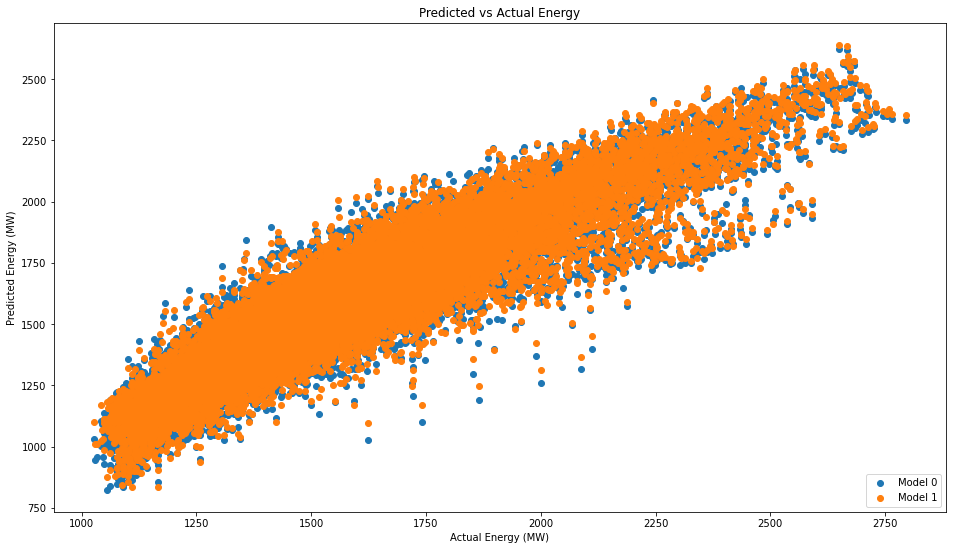

In [13]:
plt.figure(figsize=(16, 9))
plt.xlabel("Actual Energy (MW)")
plt.ylabel("Predicted Energy (MW)")
plt.title("Predicted vs Actual Energy")
plt.scatter(train["mw"], model0.predict(train), label="Model 0")
plt.scatter(train["mw"], model1.predict(train), label="Model 1")
plt.legend(loc="lower right")
plt.show()

In [14]:
import numpy as np


Y = np.array(train["mw"])
Y_hat = np.array(model1.predict(train))

In [15]:
100 * np.mean(np.abs(Y - Y_hat) / Y)

4.910985530518264

# Taking the residue

In [16]:
train["Residual"]=Y-Y_hat

## Visualizing residuals

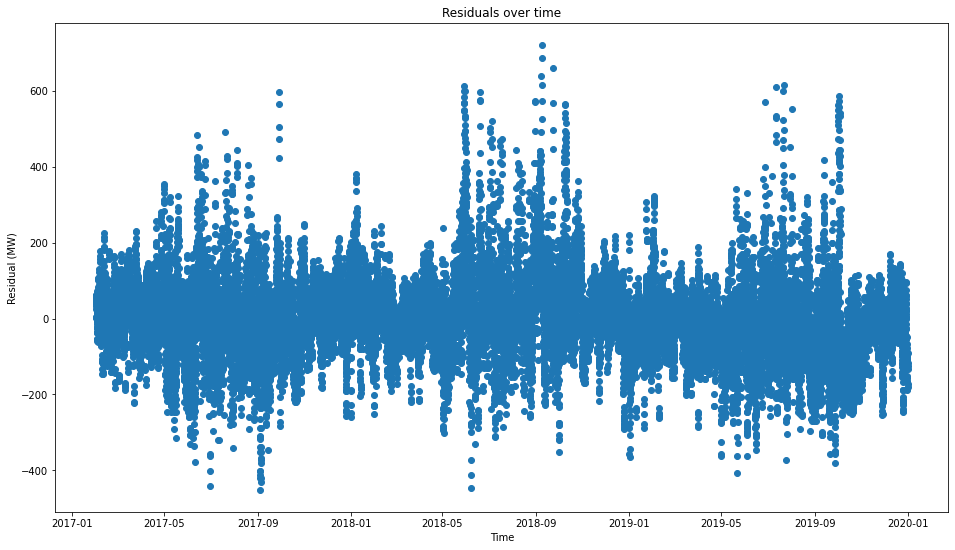

In [17]:
plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Residual (MW)")
plt.title("Residuals over time")
plt.scatter(train["date"], train["Residual"])
plt.show()

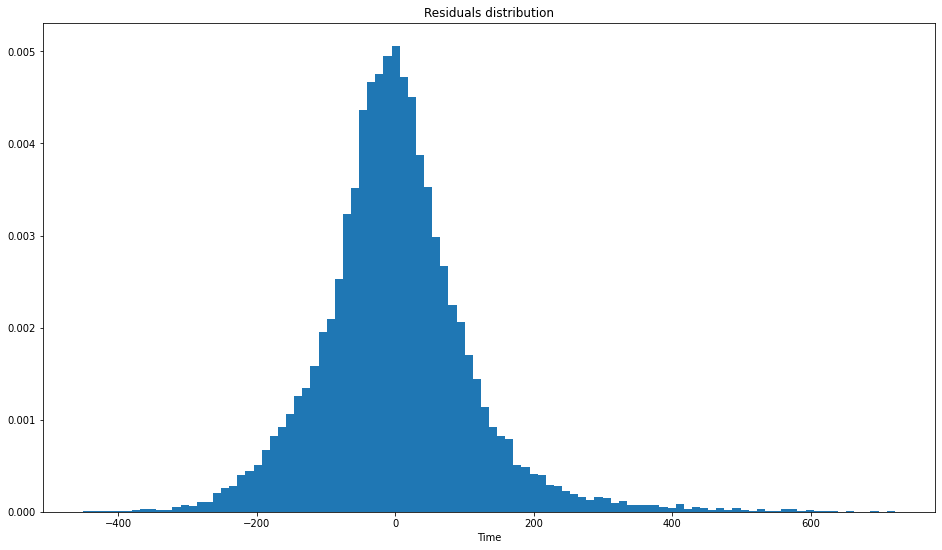

In [18]:
plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.title("Residuals distribution")
plt.hist( train["Residual"], density=True, bins=100)
plt.show()

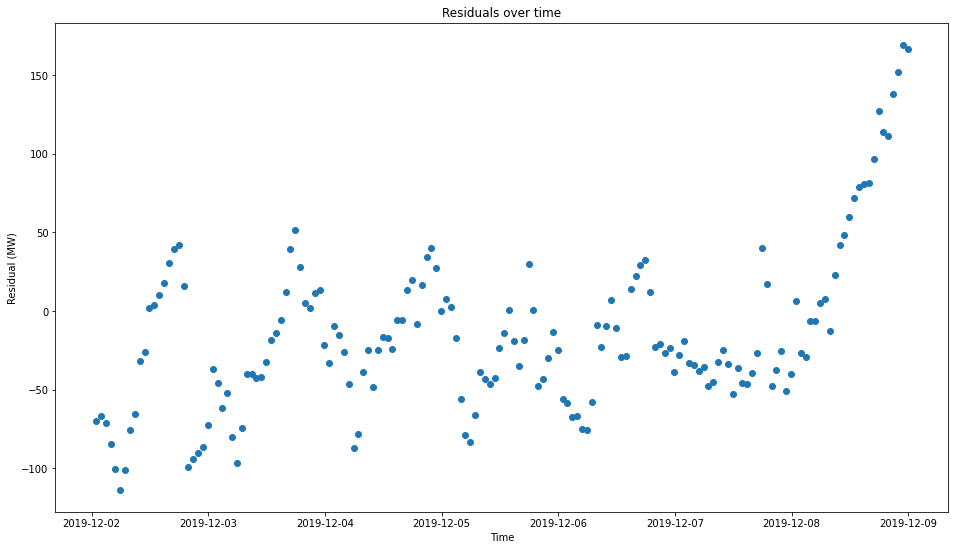

In [19]:
plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Residual (MW)")
plt.title("Residuals over time")
plt.scatter(
    train["date"][
        (train["year"] == 2019) & (train["date"].dt.isocalendar().week == 49)
    ],
    train["Residual"][
        (train["year"] == 2019) & (train["date"].dt.isocalendar().week == 49)
    ],
)
plt.show()

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train["date"] = pd.to_datetime(train["date"])
temp = train.set_index("date")
fit1 = ExponentialSmoothing(
    temp["Residual"],
    trend=None,
    seasonal="add",
    seasonal_periods=24
).fit()

print(fit1.summary())

/home/marco/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/marco/.local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Residual   No. Observations:                25536
Model:             ExponentialSmoothing   SSE                       55695539.955
Optimized:                         True   AIC                         196361.689
Trend:                             None   BIC                         196573.533
Seasonal:                      Additive   AICC                        196361.752
Seasonal Periods:                    24   Date:                 Fri, 21 May 2021
Box-Cox:                          False   Time:                         23:27:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9642528                alpha                 True
smoothing_seasonal       

In [21]:
train["resid"] = fit1.fittedvalues.values
test["resid"] = fit1.forecast(744).values

/home/marco/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [22]:
test

date        mw  temp  hour  day  weekday  month  \
0   2020-01-01 00:53:00+00:00  1363.428  31.0     0    1        2      1   
1   2020-01-01 01:53:00+00:00  1335.975  29.0     1    1        2      1   
2   2020-01-01 02:53:00+00:00  1296.817  30.0     2    1        2      1   
3   2020-01-01 03:53:00+00:00  1288.403  30.0     3    1        2      1   
4   2020-01-01 04:53:00+00:00  1292.263  31.0     4    1        2      1   
..                        ...       ...   ...   ...  ...      ...    ...   
739 2020-01-31 19:53:00+00:00  1719.479  34.0    19   31        4      1   
740 2020-01-31 20:53:00+00:00  1682.977  33.0    20   31        4      1   
741 2020-01-31 21:53:00+00:00  1610.025  33.0    21   31        4      1   
742 2020-01-31 22:53:00+00:00  1516.644  33.0    22   31        4      1   
743 2020-01-31 23:53:00+00:00  1434.425  34.0    23   31        4      1   

     year       resid  
0    2020 -121.148699  
1    2020 -115.884567  
2    2020 -117.084411  
3    2020 -121.253545  
4    2020 -127.527093  
..    ...         ...  
739  2020 -132.882153  
740  2020 -128.292163  
741  2020 -121.671856  
742  2020 -117.243704  
743  2020 -118.385383  

[744 rows x 9 columns]

In [23]:
train["Residual2"]=Y-Y_hat-fit1.fittedvalues.values

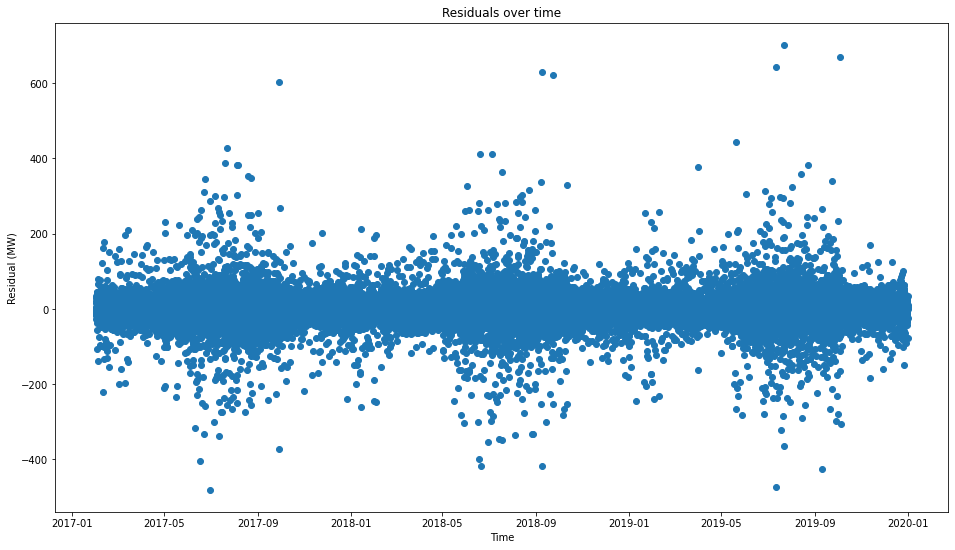

In [24]:
plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Residual (MW)")
plt.title("Residuals over time")
plt.scatter(train["date"], train["Residual2"])
plt.show()

In [25]:
Y-Y_hat

array([  63.009121  ,   53.6749394 ,   37.15699858, ..., -134.12192873,
       -125.90452989, -118.05991461])

In [26]:
fit1.fittedvalues

date
2017-02-01 00:53:00+00:00     28.527500
2017-02-01 01:53:00+00:00     59.536950
2017-02-01 02:53:00+00:00     54.238313
2017-02-01 03:53:00+00:00     40.961219
2017-02-01 04:53:00+00:00     30.944885
                                ...    
2019-12-31 19:53:00+00:00   -102.776984
2019-12-31 20:53:00+00:00   -172.557691
2019-12-31 21:53:00+00:00   -167.067721
2019-12-31 22:53:00+00:00   -130.577398
2019-12-31 23:53:00+00:00   -127.164643
Length: 25536, dtype: float64

In [27]:
100 * np.mean(
    np.abs(Y - Y_hat - fit1.fittedvalues.values) / (Y - fit1.fittedvalues.values)
)

1.8321822892666106

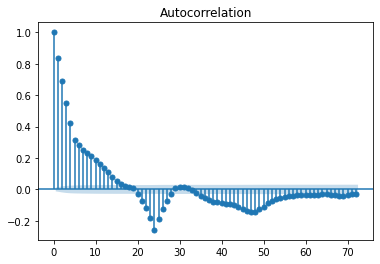

In [28]:
from statsmodels.graphics import tsaplots


fig = tsaplots.plot_acf(train['resid'].diff(24)[25:], lags = 72)
plt.show()

# ARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


fit2 = SARIMAX(train["resid"], order=(2, 0, 0), seasonal_order=(0, 1, 1, 24)).fit()
print(fit2.summary())

In [ ]:
train["Residual2"]=Y-Y_hat-fit2.fittedvalues.values

In [ ]:
plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Residual (MW)")
plt.title("Residuals over time")
plt.scatter(train["date"], train["Residual2"])
plt.show()

In [ ]:
100 * np.mean(
    np.abs(Y - Y_hat - fit2.fittedvalues.values) / (Y - fit2.fittedvalues.values)
)

In [ ]:
100 * np.mean(
    np.abs(Y - Y_hat - 0.5 * (fit2.fittedvalues.values + fit1.fittedvalues.values))
    / (Y - 0.5 * (fit2.fittedvalues.values + fit1.fittedvalues.values))
)